In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
ts_data = pd.read_csv('Electricity.csv')
ts_data['Month'] = pd.to_datetime(ts_data['Month'])
print(ts_data.head())
print(ts_data.dtypes)

       Month  Electricity
0 2005-01-01       9407.0
1 2005-02-01       8827.0
2 2005-03-01       9880.0
3 2005-04-01       9364.0
4 2005-05-01      10580.0
Month          datetime64[ns]
Electricity           float64
dtype: object


In [3]:
ts_data['Mo_Name'] = ts_data['Month'].dt.month_name()
print(ts_data.head())
print(ts_data.dtypes)

       Month  Electricity   Mo_Name
0 2005-01-01       9407.0   January
1 2005-02-01       8827.0  February
2 2005-03-01       9880.0     March
3 2005-04-01       9364.0     April
4 2005-05-01      10580.0       May
Month          datetime64[ns]
Electricity           float64
Mo_Name                object
dtype: object


In [4]:
ts_data['Mo_Name'] = ts_data['Mo_Name'].astype(str)
ts_data = pd.get_dummies(ts_data, prefix = ['Mo_Name'], columns=['Mo_Name'], drop_first = True) ## Create a column for each month
ts_data = ts_data.drop(columns=['Month'])

ts_data.head()

,Electricity,Mo_Name_August,Mo_Name_December,Mo_Name_February,Mo_Name_January,Mo_Name_July,Mo_Name_June,Mo_Name_March,Mo_Name_May,Mo_Name_November,Mo_Name_October,Mo_Name_September
0,9407.0,0,0,0,1,0,0,0,0,0,0,0
1,8827.0,0,0,1,0,0,0,0,0,0,0,0
2,9880.0,0,0,0,0,0,0,1,0,0,0,0
3,9364.0,0,0,0,0,0,0,0,0,0,0,0
4,10580.0,0,0,0,0,0,0,0,1,0,0,0


In [6]:
ts_data['t_mo'] = ts_data.index + 1    ## To examine whether the time trend is linear
ts_data['t_mo2'] = ts_data['t_mo']**2 ## To examine whether the trend is quadratic
ts_data['t_mo3'] = ts_data['t_mo']**3 ## To examine whether the trend is cubic

print(ts_data.head())

,Electricity,Mo_Name_August,Mo_Name_December,Mo_Name_February,Mo_Name_January,Mo_Name_July,Mo_Name_June,Mo_Name_March,Mo_Name_May,Mo_Name_November,Mo_Name_October,Mo_Name_September,t_mo,t_mo2,t_mo3
0,9407.0,0,0,0,1,0,0,0,0,0,0,0,1,1,1
1,8827.0,0,0,1,0,0,0,0,0,0,0,0,2,4,8
2,9880.0,0,0,0,0,0,0,1,0,0,0,0,3,9,27
3,9364.0,0,0,0,0,0,0,0,0,0,0,0,4,16,64
4,10580.0,0,0,0,0,0,0,0,1,0,0,0,5,25,125


In [25]:
#Write to csv to evaluate R2 of scatterplot relations below
ts_data.to_csv('Electricity_with_cols.csv')

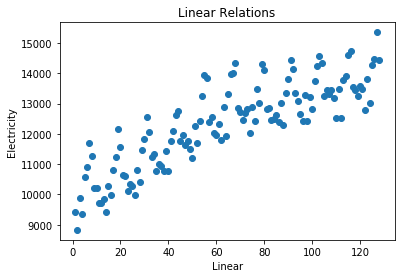

In [9]:
# Visualize the data with a scatter plot
plt.scatter(ts_data['t_mo'], ts_data['Electricity'])
plt.title('Linear Relations')
plt.xlabel('Linear')
plt.ylabel('Electricity')
plt.show()

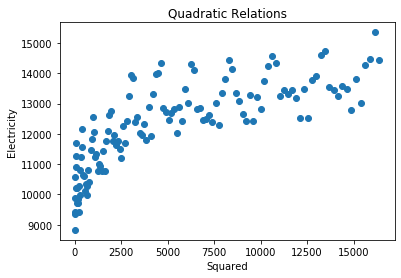

In [11]:
plt.scatter(ts_data['t_mo2'], ts_data['Electricity'])
plt.title('Quadratic Relations')
plt.xlabel('Squared')
plt.ylabel('Electricity')
plt.show()

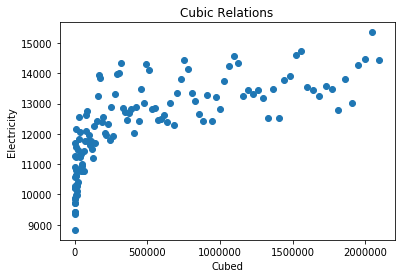

In [12]:
plt.scatter(ts_data['t_mo3'], ts_data['Electricity'])
plt.title('Cubic Relations')
plt.xlabel('Cubed')
plt.ylabel('Electricity')
plt.show()

In [13]:
training = ts_data.loc[0:109]
validation = ts_data.loc[110:127]
trainplusvalid = ts_data.loc[0:127]
forecast = ts_data.loc[128:143]

In [14]:
y_train = training['Electricity']
x_train = training.drop(columns='Electricity')
y_valid = validation['Electricity']
x_valid = validation.drop(columns=['Electricity'])
y_trainplusvalid = trainplusvalid['Electricity']
x_trainplusvalid = trainplusvalid.drop(columns=['Electricity'])
x_forecast = forecast.drop(columns=['Electricity'])

In [16]:
import sklearn
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train, y_train)

X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

y_pred = mlr.predict(x_valid)
df = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred})  

print(df.sort_index())

R2 = sklearn.metrics.r2_score(y_valid, y_pred)
MAE = sklearn.metrics.mean_absolute_error(y_valid, y_pred)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_valid, y_pred))

print("R2: {0:.3f} ".format(R2))
print("MAE: {0:.1f} ".format(MAE))
print("RMSE: {0:.1f} ".format(RMSE))

                            OLS Regression Results                            
Dep. Variable:            Electricity   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     260.0
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.78e-69
Time:                        16:06:03   Log-Likelihood:                -746.74
No. Observations:                 110   AIC:                             1523.
Df Residuals:                      95   BIC:                             1564.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9099.5811    115.76

C:\Users\rdmclean\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [17]:
#Evaluate the model without squared term
x_train_no_mo2 = x_train.drop(columns=['t_mo2'])
x_valid_no_mo2 = x_valid.drop(columns=['t_mo2'])
mlr.fit(x_train_no_mo2, y_train)


X2 = sm.add_constant(x_train_no_mo2)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

y_pred = mlr.predict(x_valid_no_mo2)
df = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred})  

print(df.sort_index())

R2 = sklearn.metrics.r2_score(y_valid, y_pred)
MAE = sklearn.metrics.mean_absolute_error(y_valid, y_pred)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_valid, y_pred))

print("R2: {0:.3f} ".format(R2))
print("MAE: {0:.1f} ".format(MAE))
print("RMSE: {0:.1f} ".format(RMSE))

                            OLS Regression Results                            
Dep. Variable:            Electricity   R-squared:                       0.974
Model:                            OLS   Adj. R-squared:                  0.971
Method:                 Least Squares   F-statistic:                     279.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           3.76e-70
Time:                        16:10:02   Log-Likelihood:                -747.36
No. Observations:                 110   AIC:                             1523.
Df Residuals:                      96   BIC:                             1561.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              9030.4410     94.65

C:\Users\rdmclean\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [18]:
#Evaluate the model without cubic term
x_train_no_mo3 = x_train.drop(columns=['t_mo3'])
x_valid_no_mo3 = x_valid.drop(columns=['t_mo3'])
mlr.fit(x_train_no_mo3, y_train)


X2 = sm.add_constant(x_train_no_mo3)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

y_pred = mlr.predict(x_valid_no_mo3)
df = pd.DataFrame({'Actual': y_valid, 'Predicted': y_pred})  

print(df.sort_index())

R2 = sklearn.metrics.r2_score(y_valid, y_pred)
MAE = sklearn.metrics.mean_absolute_error(y_valid, y_pred)
RMSE = np.sqrt(sklearn.metrics.mean_squared_error(y_valid, y_pred))

print("R2: {0:.3f} ".format(R2))
print("MAE: {0:.1f} ".format(MAE))
print("RMSE: {0:.1f} ".format(RMSE))

                            OLS Regression Results                            
Dep. Variable:            Electricity   R-squared:                       0.973
Model:                            OLS   Adj. R-squared:                  0.969
Method:                 Least Squares   F-statistic:                     262.4
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           7.37e-69
Time:                        16:10:22   Log-Likelihood:                -750.78
No. Observations:                 110   AIC:                             1530.
Df Residuals:                      96   BIC:                             1567.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8940.9053    102.80

C:\Users\rdmclean\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [19]:
# Train the model on the full dataset
x_trainplusvalid_no_mo3 = x_trainplusvalid.drop(columns=['t_mo3'])
mlr.fit(x_trainplusvalid_no_mo3, y_trainplusvalid)

X2 = sm.add_constant(x_trainplusvalid_no_mo3)
est = sm.OLS(y_trainplusvalid, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:            Electricity   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.972
Method:                 Least Squares   F-statistic:                     337.7
Date:                Mon, 07 Oct 2019   Prob (F-statistic):           1.81e-84
Time:                        16:13:18   Log-Likelihood:                -874.65
No. Observations:                 128   AIC:                             1777.
Df Residuals:                     114   BIC:                             1817.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              8929.3607     93.25

C:\Users\rdmclean\AppData\Local\Continuum\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [20]:
x_forecast_no_mo3 = x_forecast.drop(columns=['t_mo3'])

y_pred = mlr.predict(x_forecast_no_mo3)

print(y_pred)

[13623.40042577 13614.10408106 13195.30773635 13274.61139163
 13331.56410084 12796.69536116 13657.64480329 13017.04879087
 14050.36186937 14368.76585695 15012.35166272 14747.21019576
 13621.10513114 13606.39126921 13182.17740728 13256.06354534]


,Mo_Name_August,Mo_Name_December,Mo_Name_February,Mo_Name_January,Mo_Name_July,Mo_Name_June,Mo_Name_March,Mo_Name_May,Mo_Name_November,Mo_Name_October,Mo_Name_September,t_mo,t_mo2
128,0,0,0,0,0,0,0,0,0,0,1,129,16641
129,0,0,0,0,0,0,0,0,0,1,0,130,16900
130,0,0,0,0,0,0,0,0,1,0,0,131,17161
131,0,1,0,0,0,0,0,0,0,0,0,132,17424
132,0,0,0,1,0,0,0,0,0,0,0,133,17689


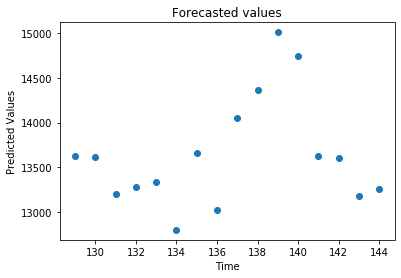

In [22]:
plt.scatter(x_forecast_no_mo3['t_mo'], y_pred)
plt.title('Forecasted values')
plt.xlabel('Time')
plt.ylabel('Predicted Values')
plt.show()